# TEST Fast5Tools package

## Imports

In [1]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
from itertools import islice
from pprint import pprint as pp
import pysam
from collections import OrderedDict, defaultdict, Counter, namedtuple

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 1000

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Fast5Wrapper import Fast5Wrapper
from Fast5Tools.Helper_fun import stdout_print
from Fast5Tools.Basecall import Basecall
from Fast5Tools.Alignment import Alignment
from Fast5Tools.Nanopolish import Nanopolish
from Fast5Tools.Fast5Parse import Fast5Parse

# Test Fast5

## Fast5 init

In [2]:
help (Fast5.__init__, full=True)

Parse a Fast5 file basecalled by albacore 2.0+ with h5py and extract the datasets raw, events and fastq.

The sequence and quality are extracted from the fastq and the event array is collapsed per contiguous kmers

* fast5_fn: STR

Path to a fast5 file basecalled by albacore 2.0+

* analyses_group: STR (default Basecall_1D_000)

Name of the basecall analyses group in the fast5 file. If None the no basecall values will be fetched

* raw_read_num: INT (default 0)

Index of the raw read values in the raw group in the fast5 file. If None the no raw values will be fetched

In [11]:
f = Fast5 (fast5_fn="./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5")
print (f)

[Fast5] file:./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5
	Read ID: 90480faf-a431-4fa6-8d95-435fc04b0388
	Count Raw signals: 27570



In [14]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5"
print (f)

[Fast5] file:./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5
	Read ID: 31192971-25e5-4cbc-8342-62c2a1dba854
	Count Raw signals: 22631
	[Basecall] Albacore_basecalling
		Sequence: ACUUCAGCCGCAGAAGCGAGAUAGG
		Quality: [ 2  3  3  3  4  2  8 15 20  9  9  9  7  7  8  8  6  7  6  7  7  6  4  7 11]
		Sequence length: 401	Empty kmers: 87	Mean quality: 8.920987654320987



In [12]:
f = Fast5 (fast5_fn="./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5", error_on_missing_basecall=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [24]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
print(f.n_raw)
print(f.sequencing_kit)
print(f.flowcell_type)

22631
SQK-RNA001
FLO-MIN106


In [25]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'nanopore_optiplex_7040_20180522_fah20140_mn24205_sequencing_run_69_99934'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),
              

## Test plot_raw

In [13]:
help (Fast5.plot_raw, full=True)

Plot raw signal and kmers boundaries

* start INT

If defined the raw plot will start at that value

* end INT

If defined the raw plot will end at that value

* plot_basecall BOOL

If True the start and end position of each kmer will be indicated by vertical lines on the graph

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

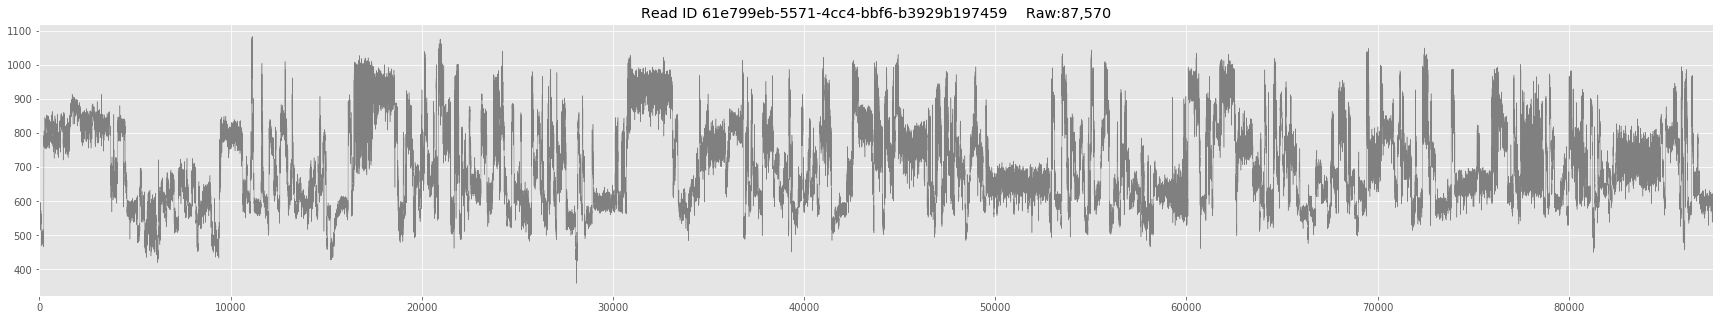

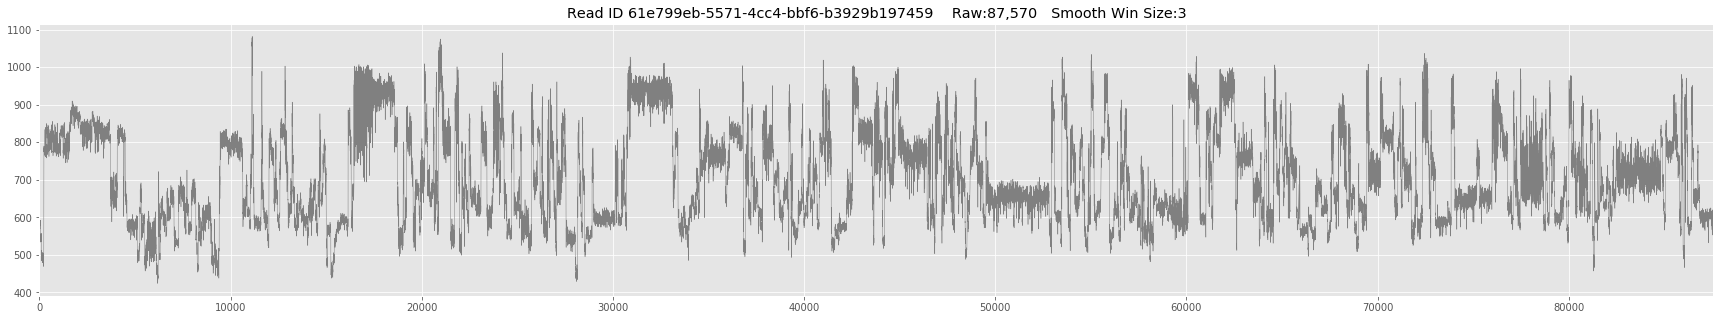

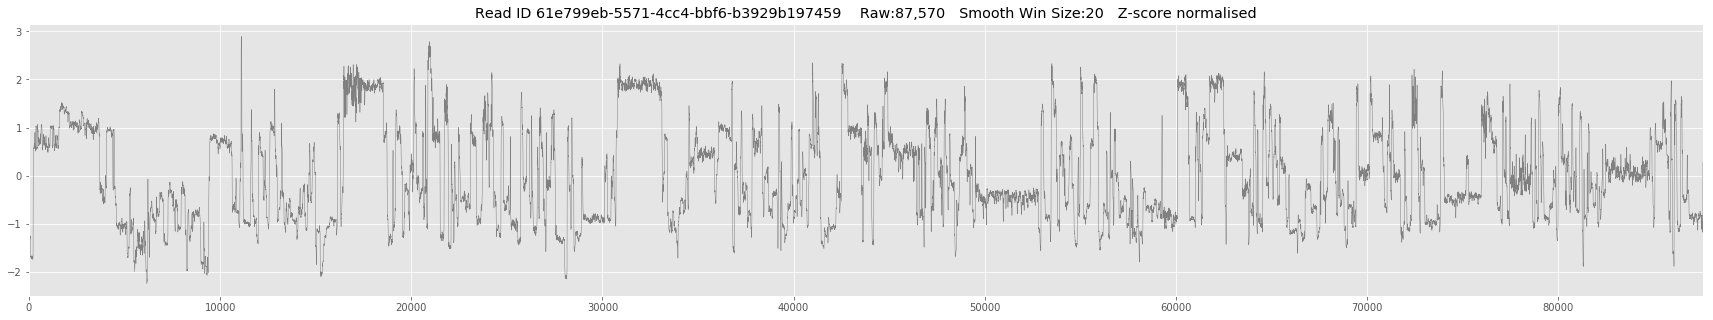

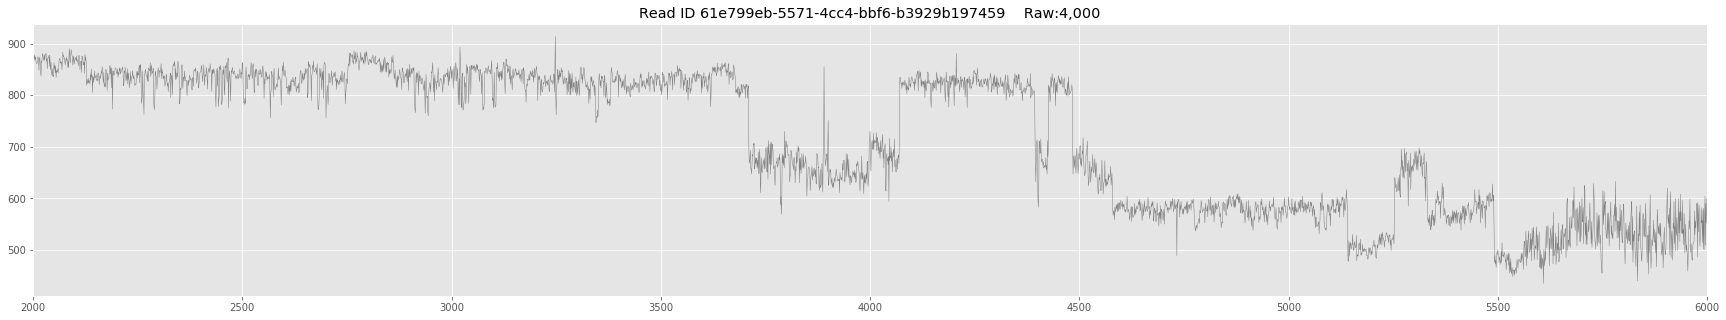

In [7]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

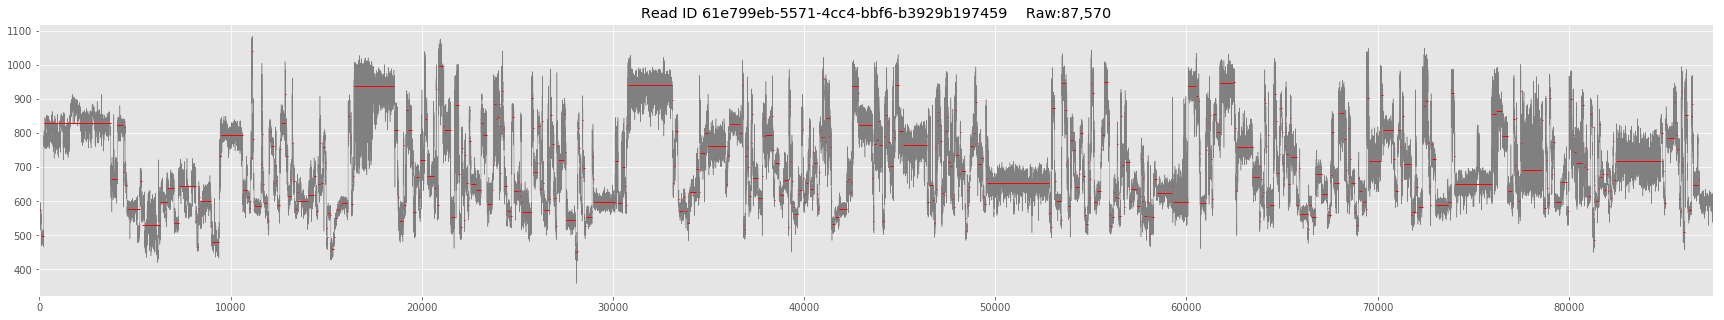

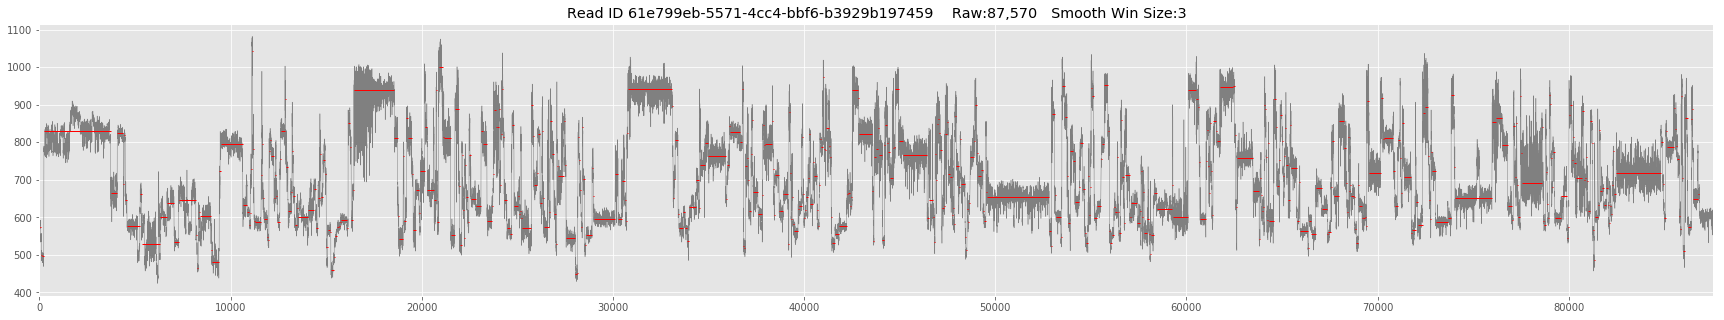

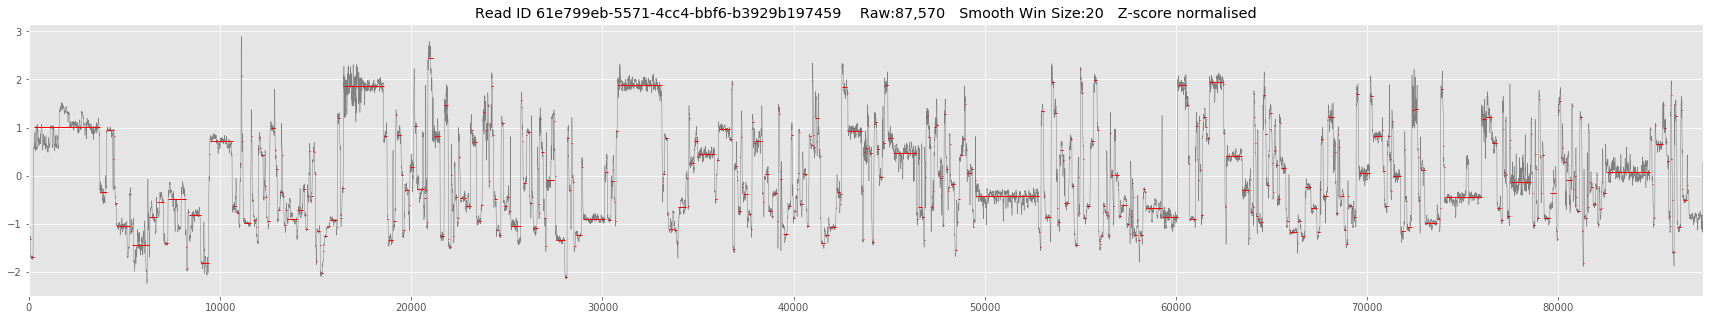

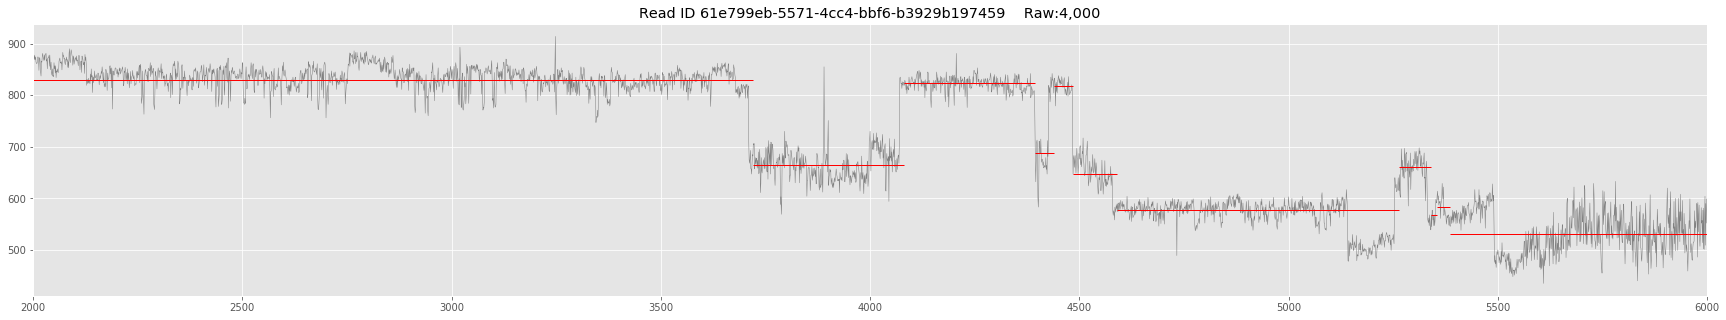

In [8]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

## Test get_raw

In [9]:
help(Fast5.get_raw, full=True)

* start INT

If defined the data will start at that value

* end INT

If defined the data will end at that value

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

In [11]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
%time display (f.get_raw ())
%time display (f.get_raw (zscore_norm=True))
%time display (f.get_raw (smoothing_win_size=5))
%time display (f.get_raw (start=2000, smoothing_win_size=5))
%time display (f.get_raw (start=2000, end= 2005, smoothing_win_size=5))

array([623, 578, 590, ..., 590, 591, 743], dtype=int16)

CPU times: user 2.14 ms, sys: 0 ns, total: 2.14 ms
Wall time: 3.85 ms


array([-0.68773109, -1.05224675, -0.95504257, ..., -0.95504257,
       -0.94694222,  0.28431065])

CPU times: user 5.05 ms, sys: 36 µs, total: 5.08 ms
Wall time: 4.71 ms


array([587., 583., 583., ..., 591., 667., 743.])

CPU times: user 1.77 s, sys: 888 µs, total: 1.77 s
Wall time: 1.77 s


array([877., 869., 874., ..., 591., 667., 743.])

CPU times: user 1.88 s, sys: 4.72 ms, total: 1.88 s
Wall time: 1.88 s


array([877., 869., 874., 869., 869.])

CPU times: user 1.91 s, sys: 4.01 ms, total: 1.91 s
Wall time: 1.91 s


# Dev

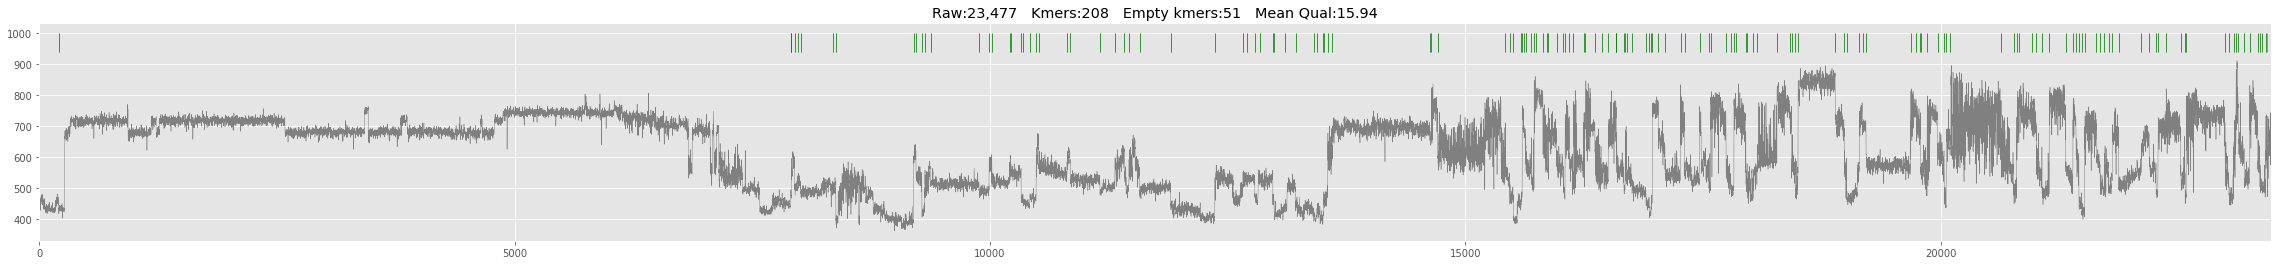

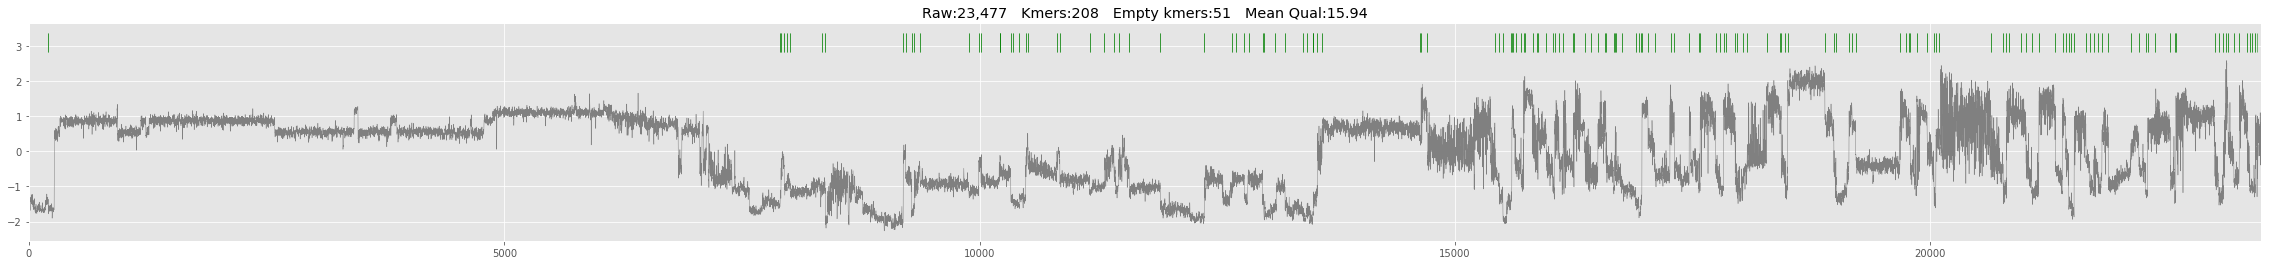

In [4]:
f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=False)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=True)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

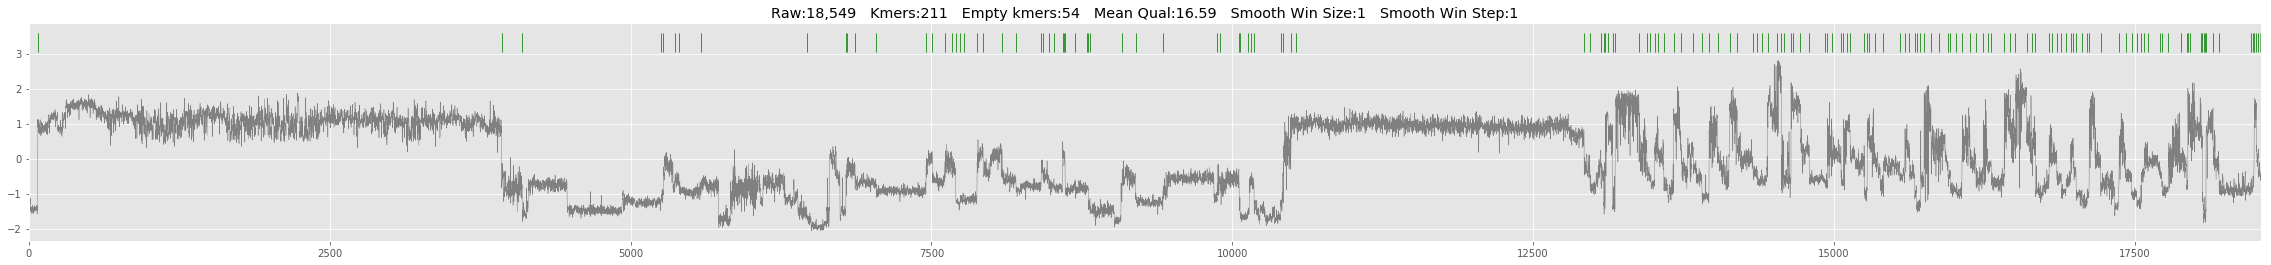

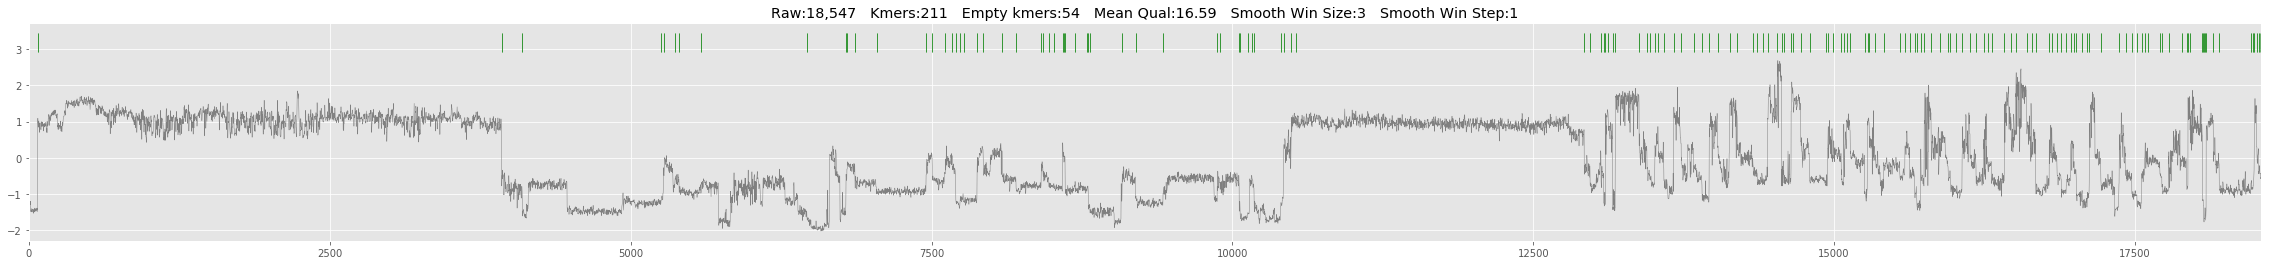

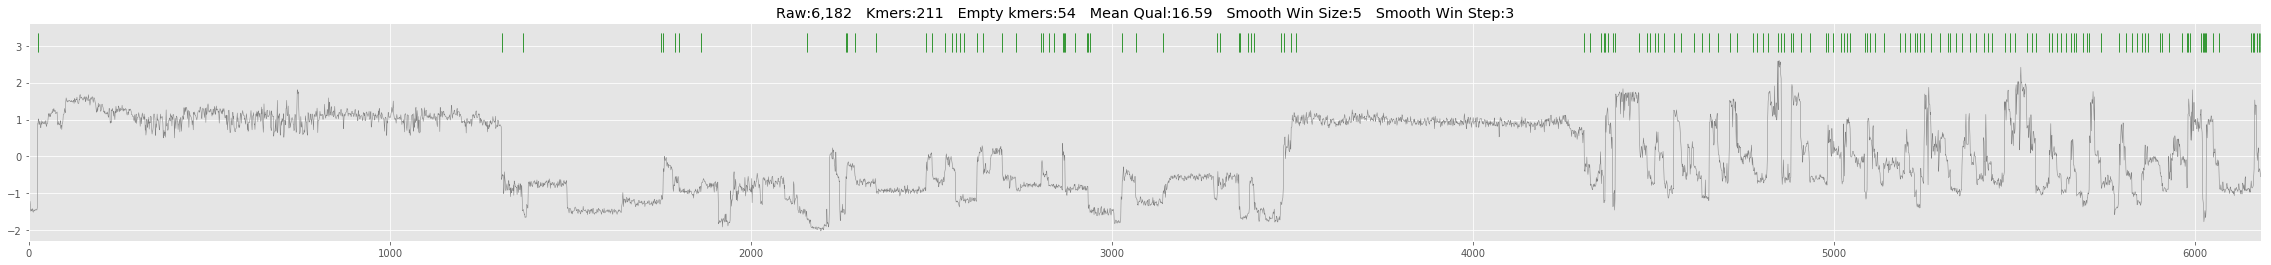

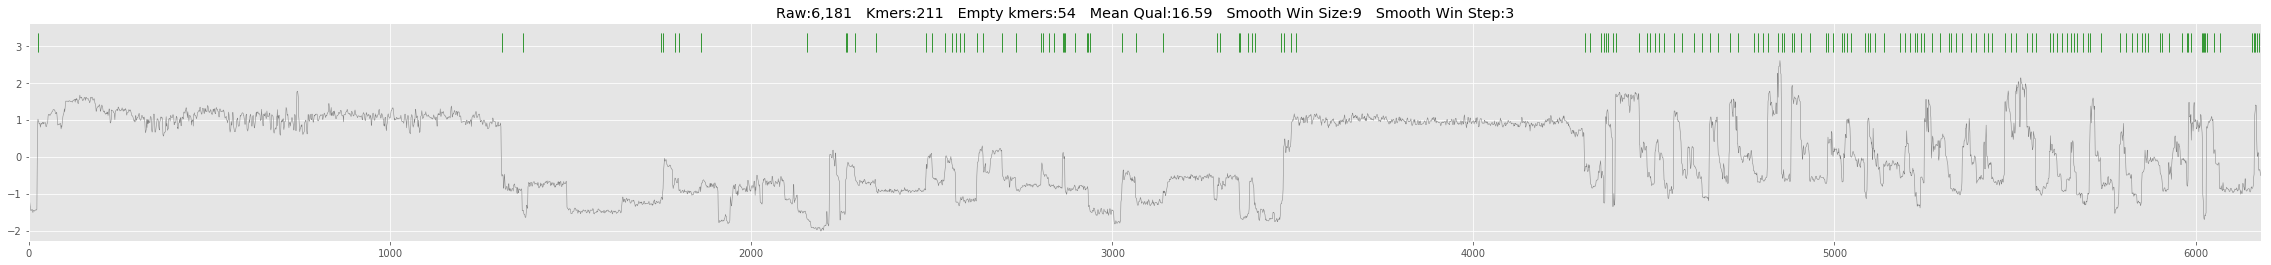

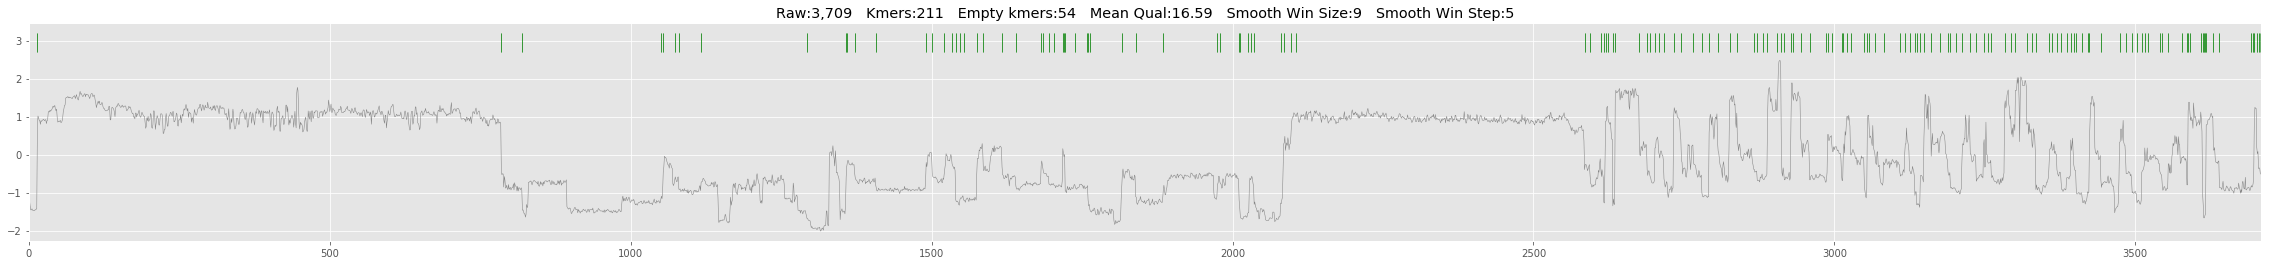

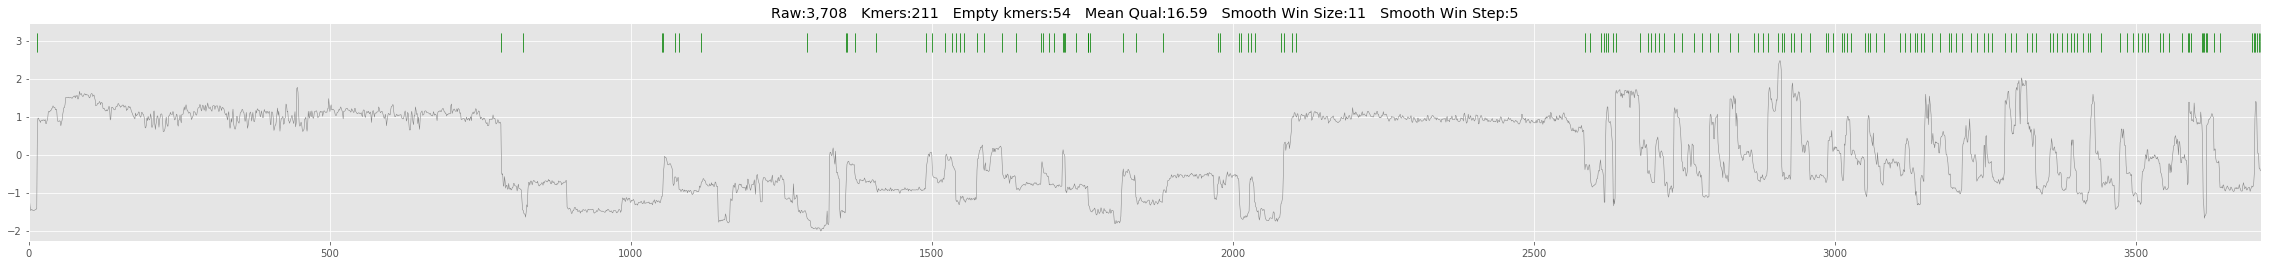

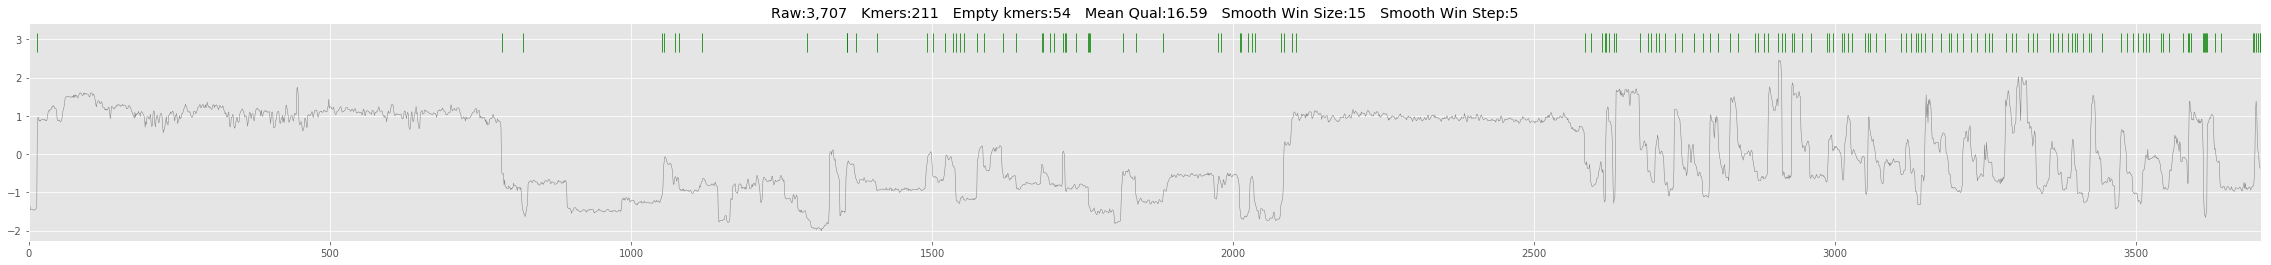

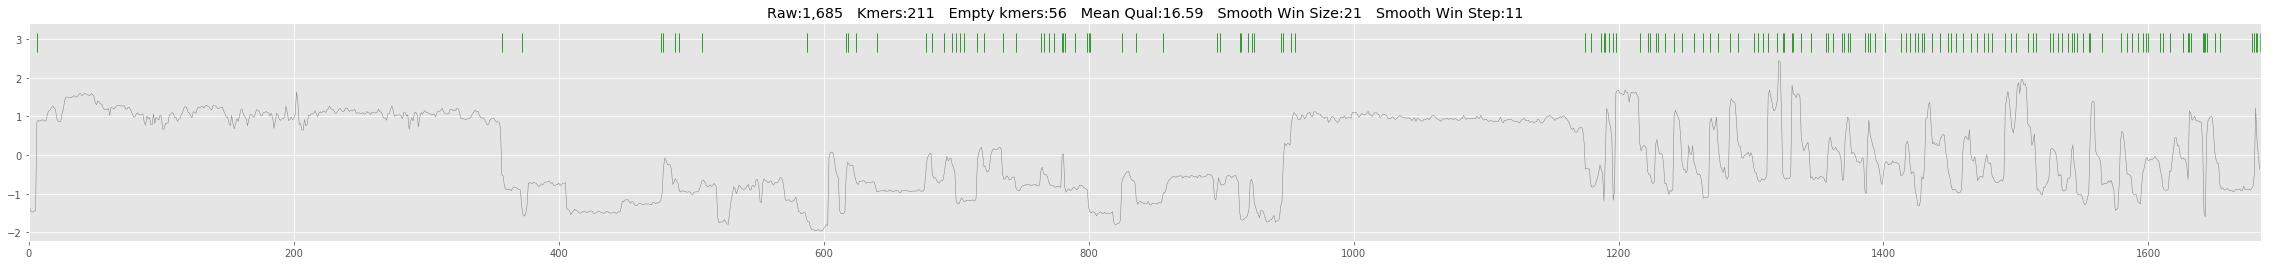

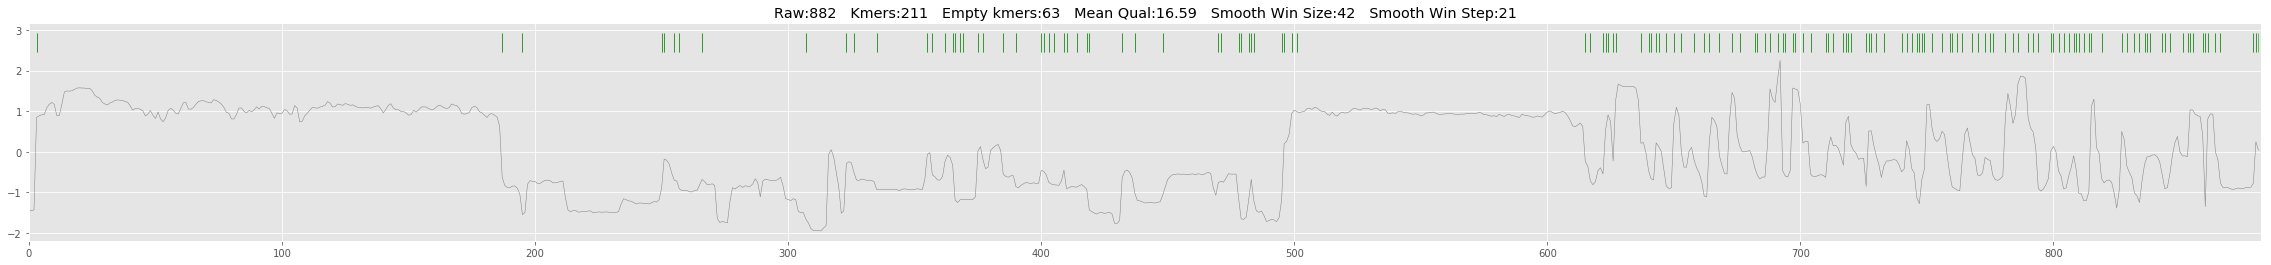

In [7]:
for win_size, win_step in [(1,1),(3,1),(5,3),(9,3),(9,5),(11,5),(15,5),(21,11),(42,21)]:
    f = Fast5 (fast5_file="./data/0/RNA_control_05.fast5", smooth_raw_signal=True, smoothing_win_size=win_size, smoothing_win_step=win_step, zscore_norm=True)
    fig = pl.figure(figsize=(40,4))
    ax = f.plot_raw()

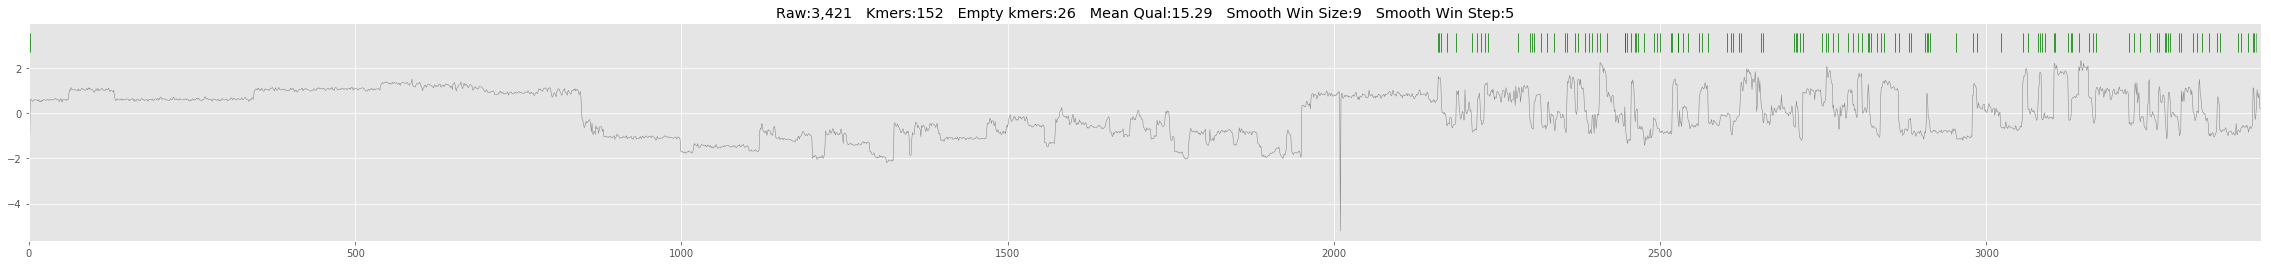

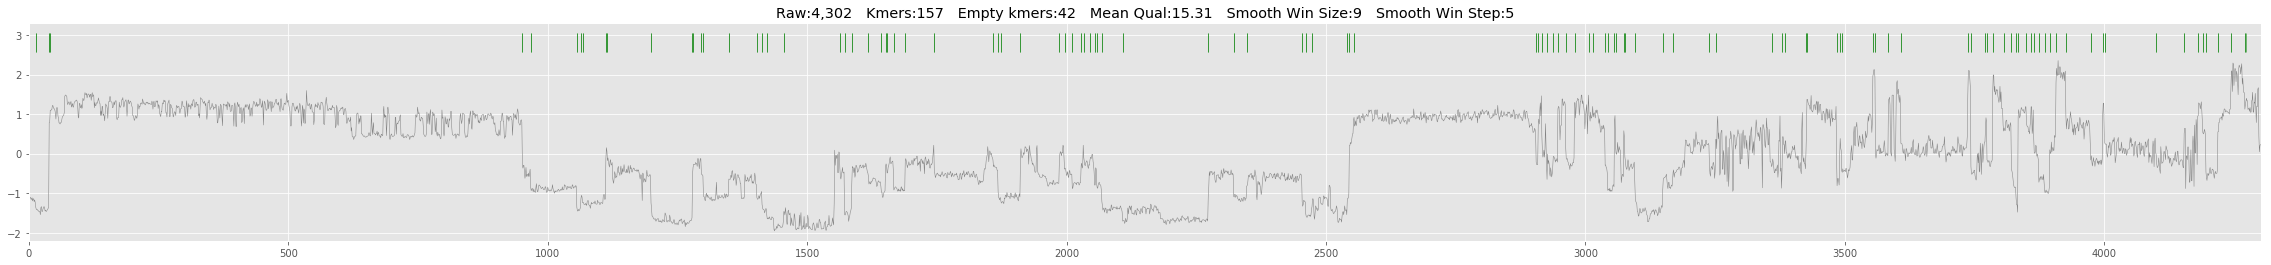

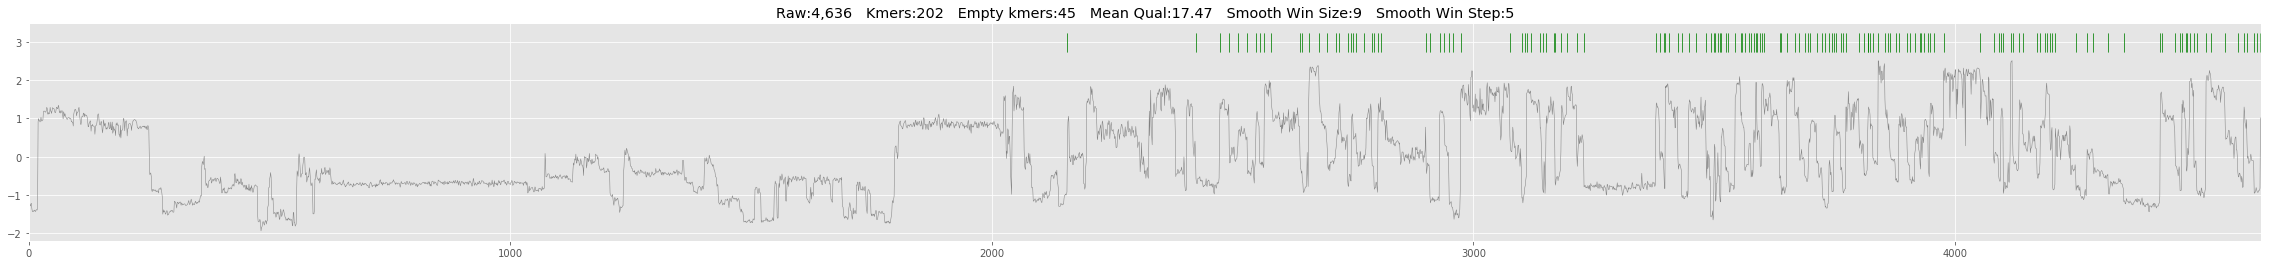

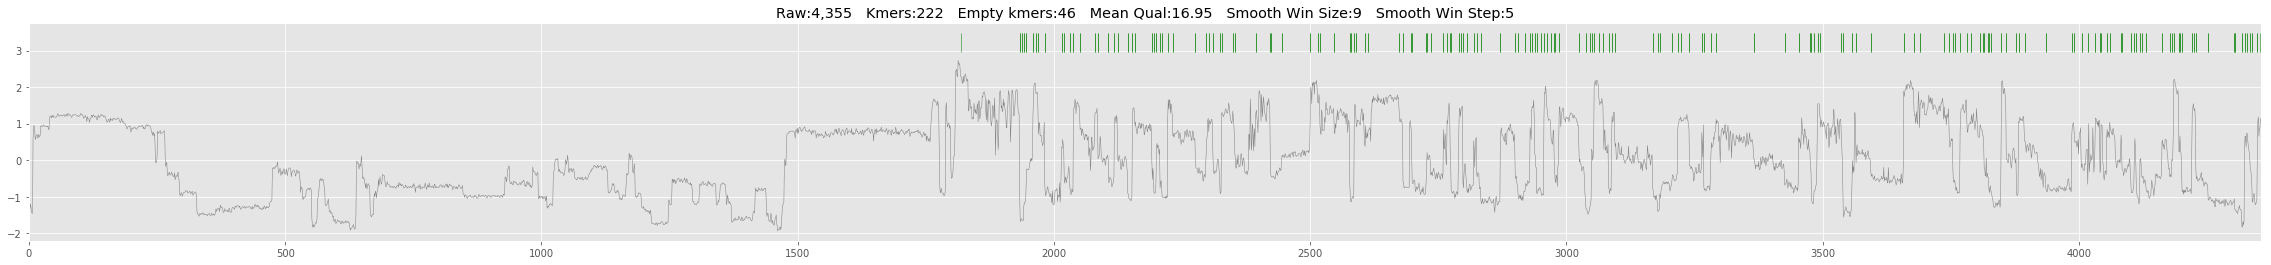

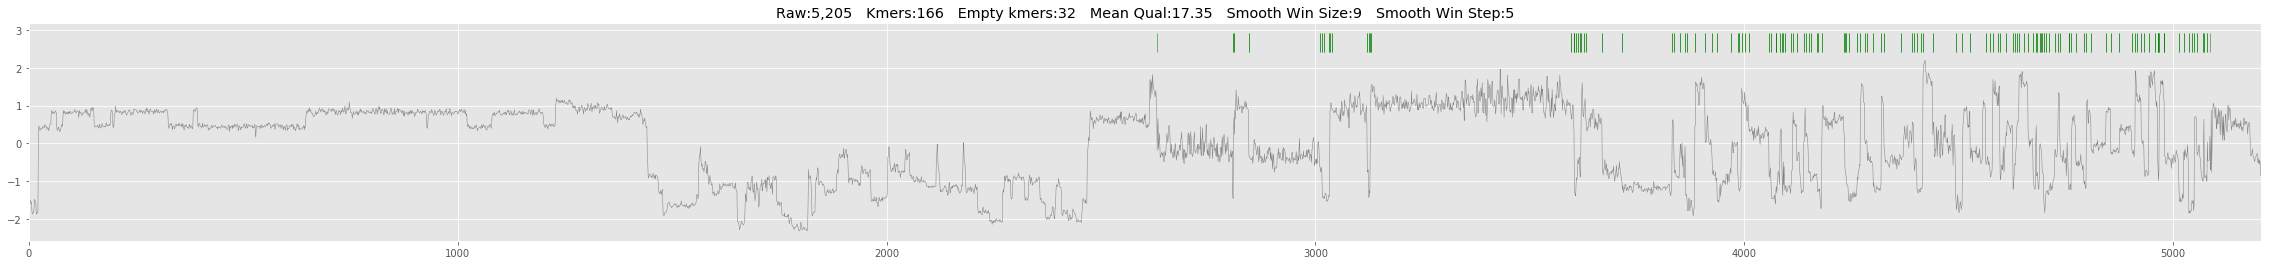

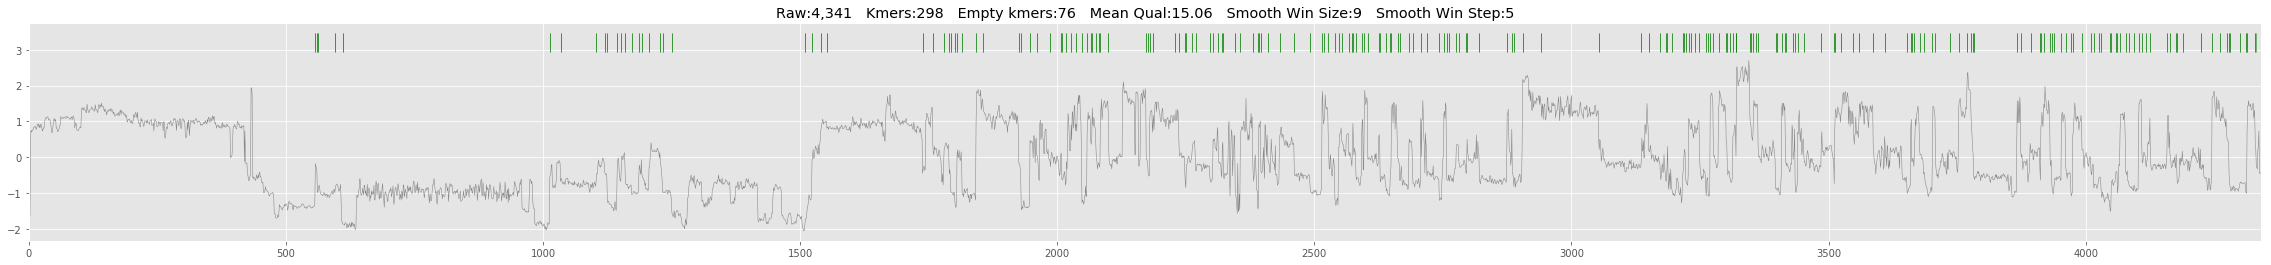

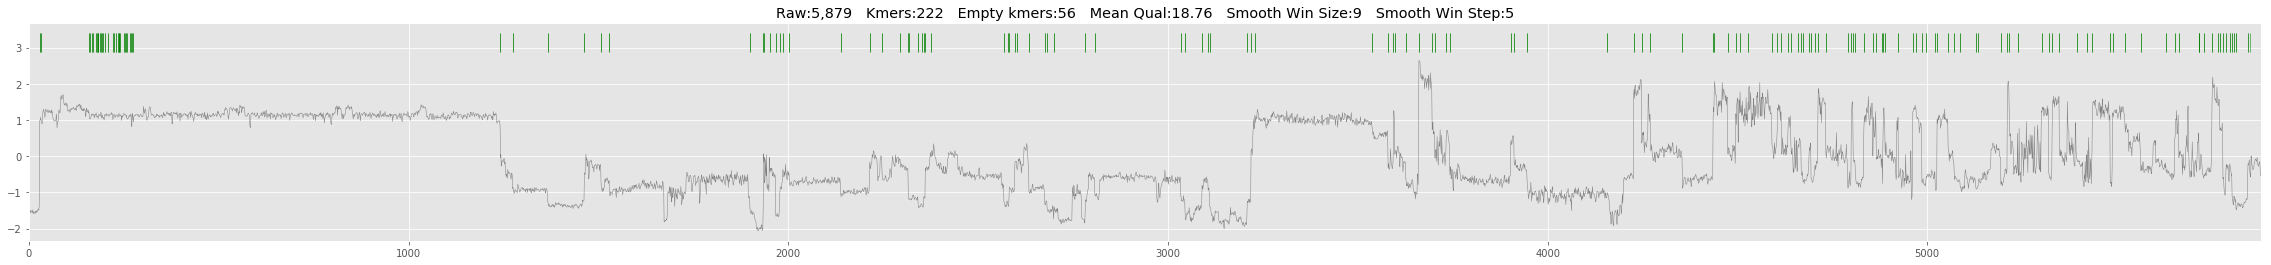

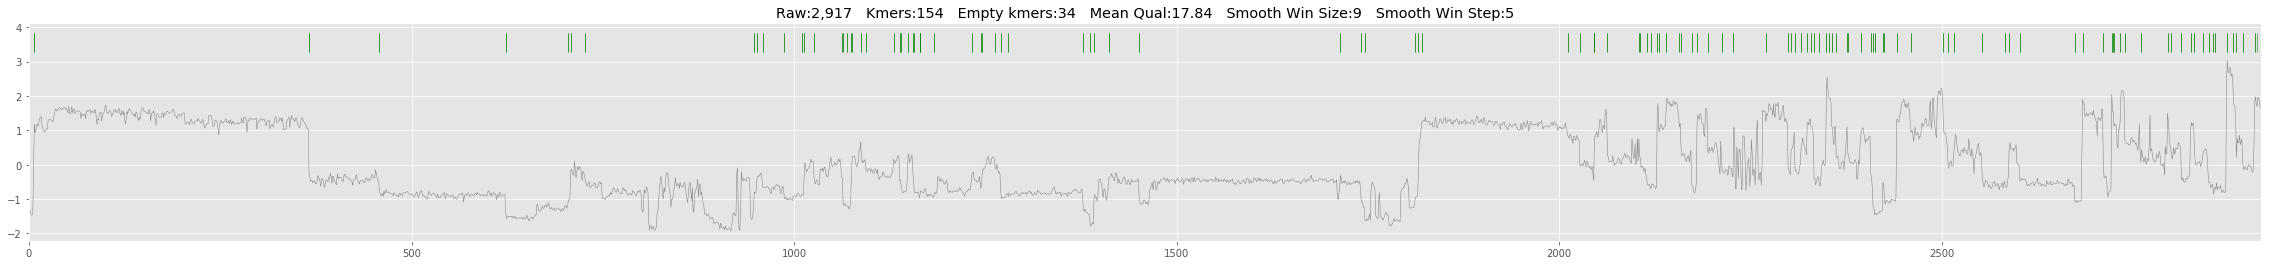

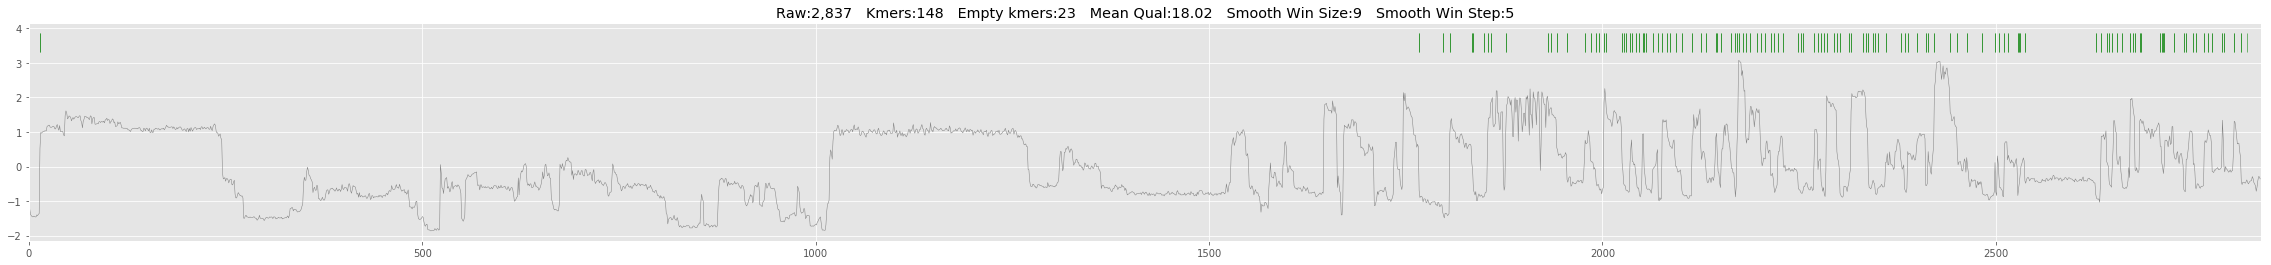

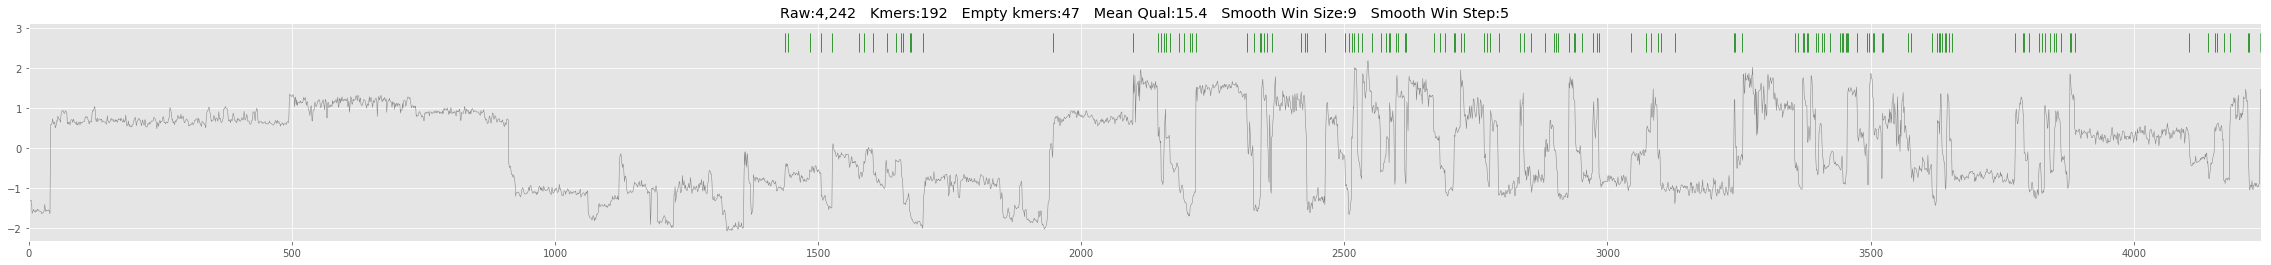

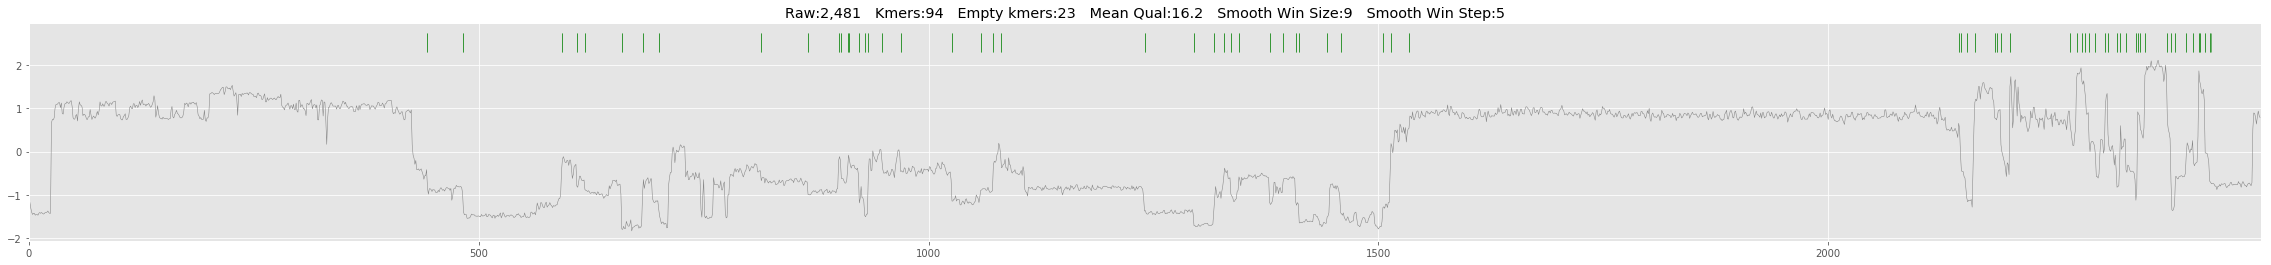

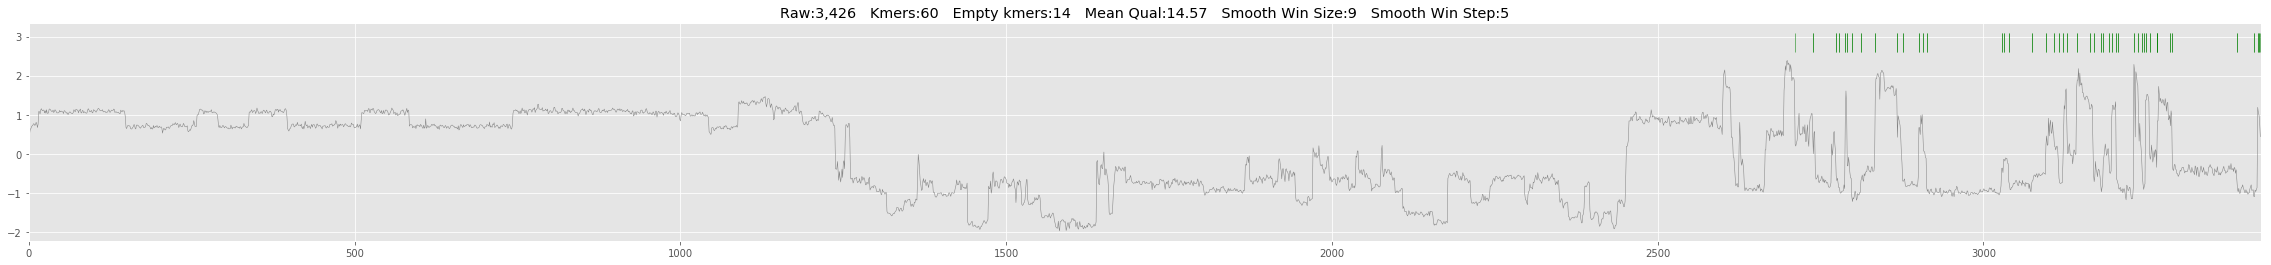

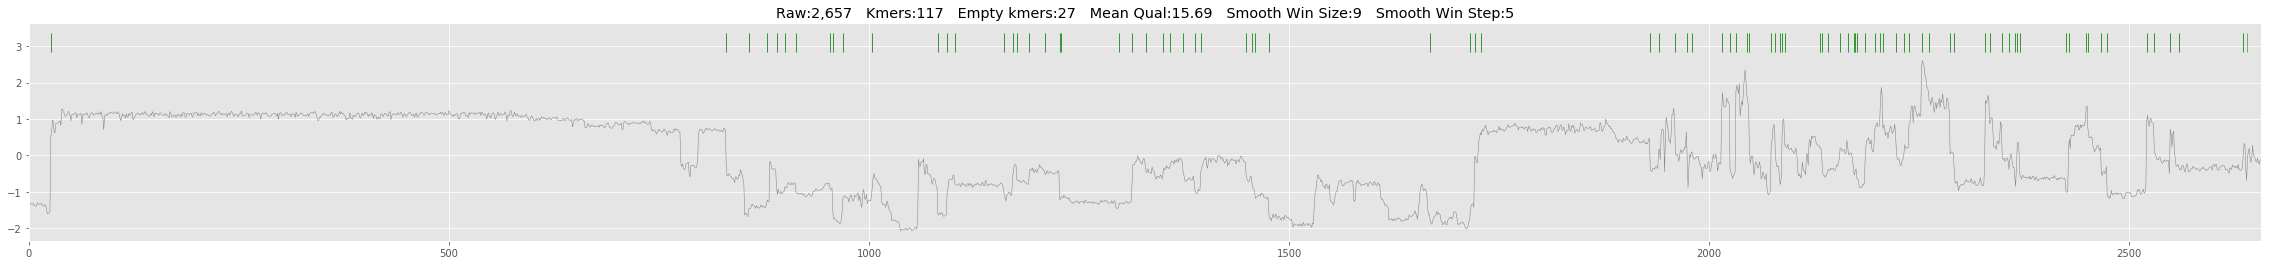

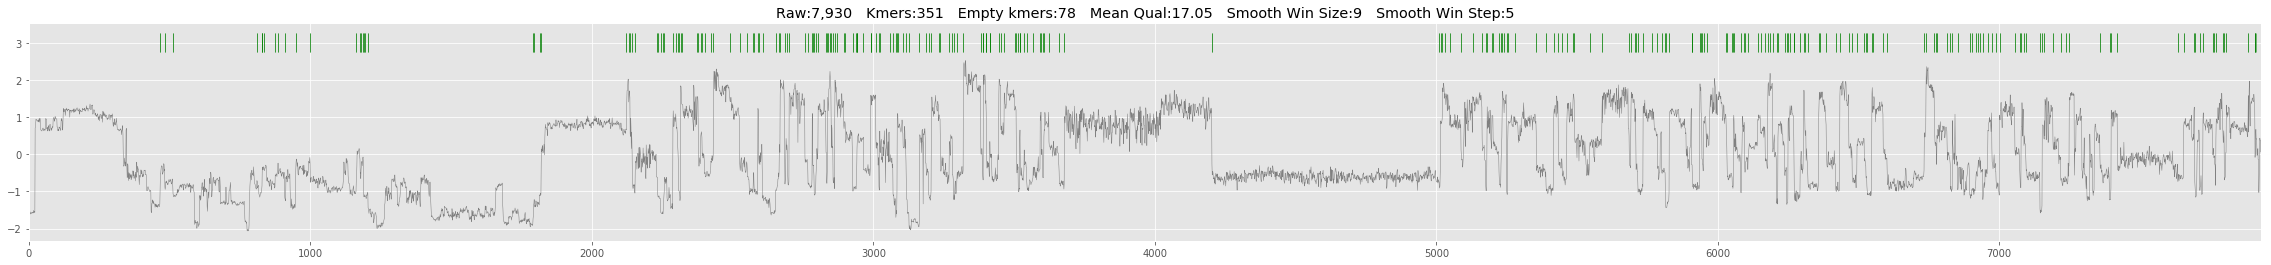

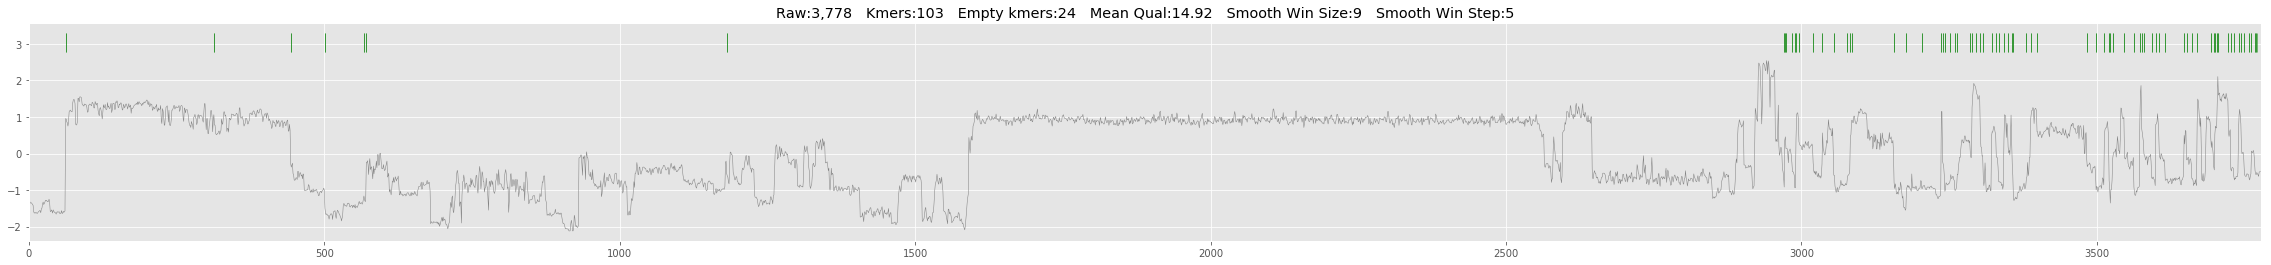

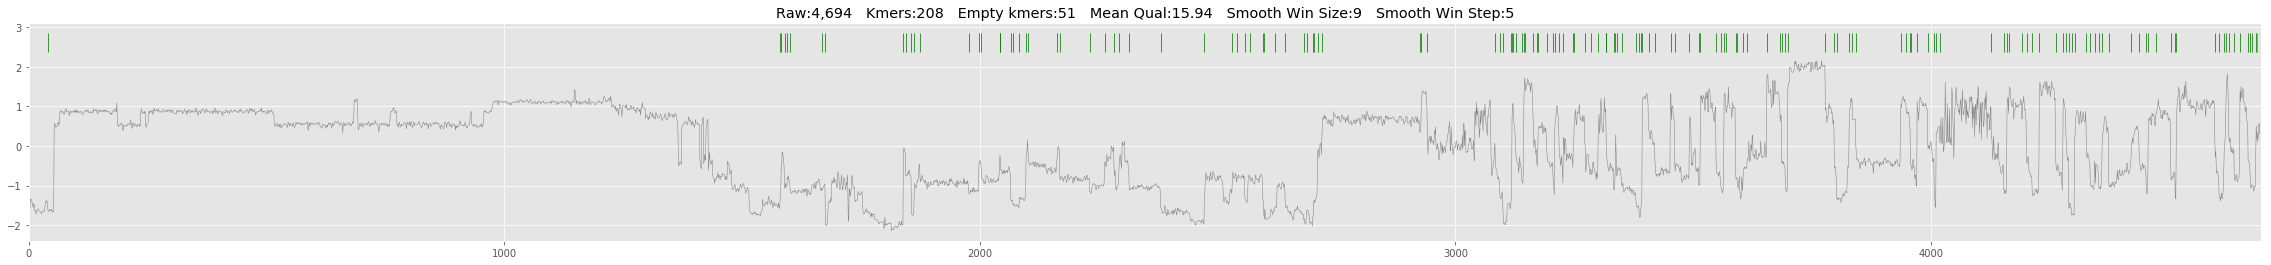

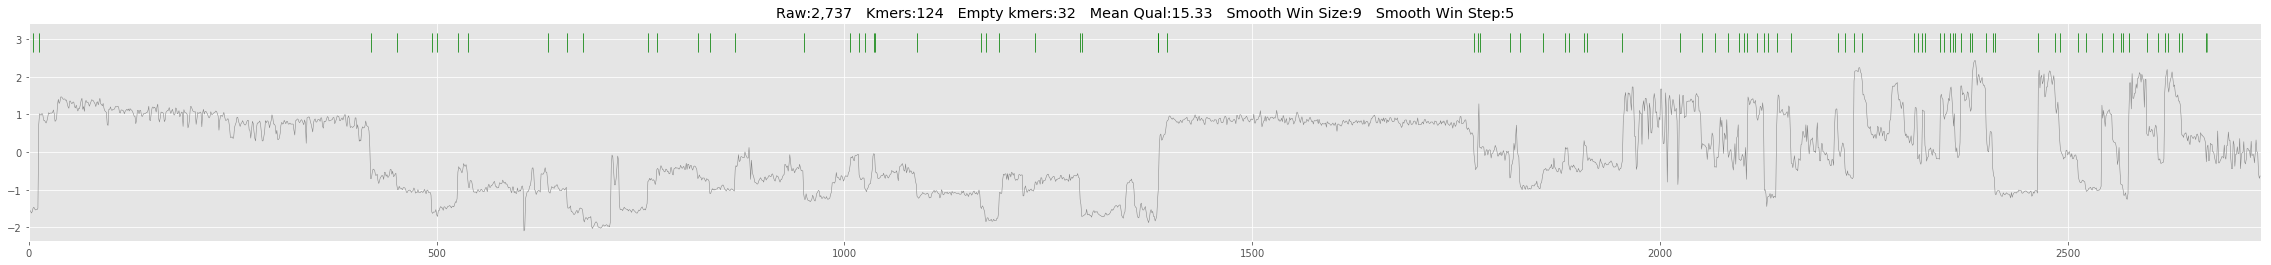

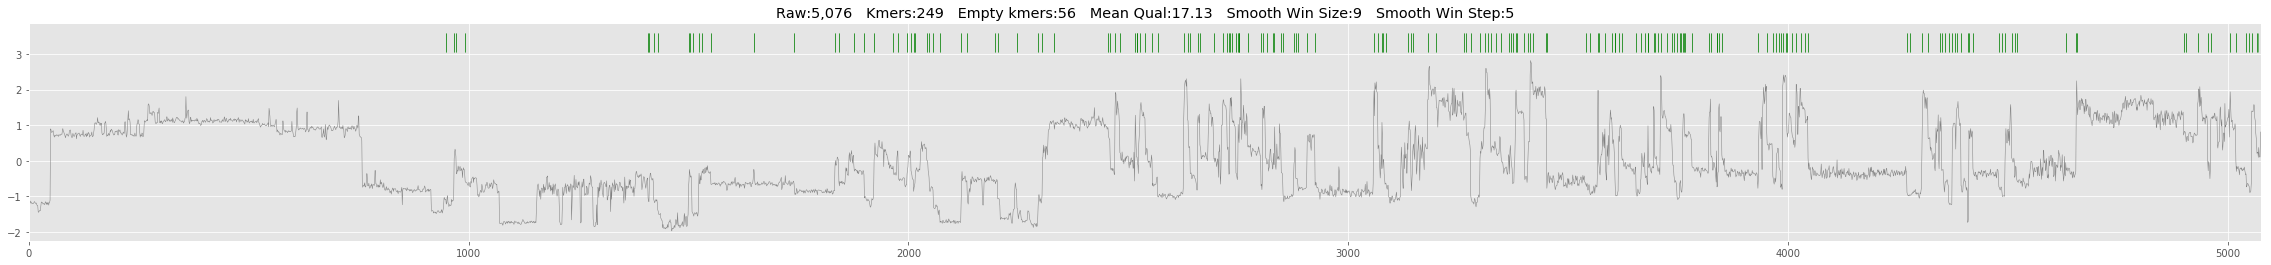

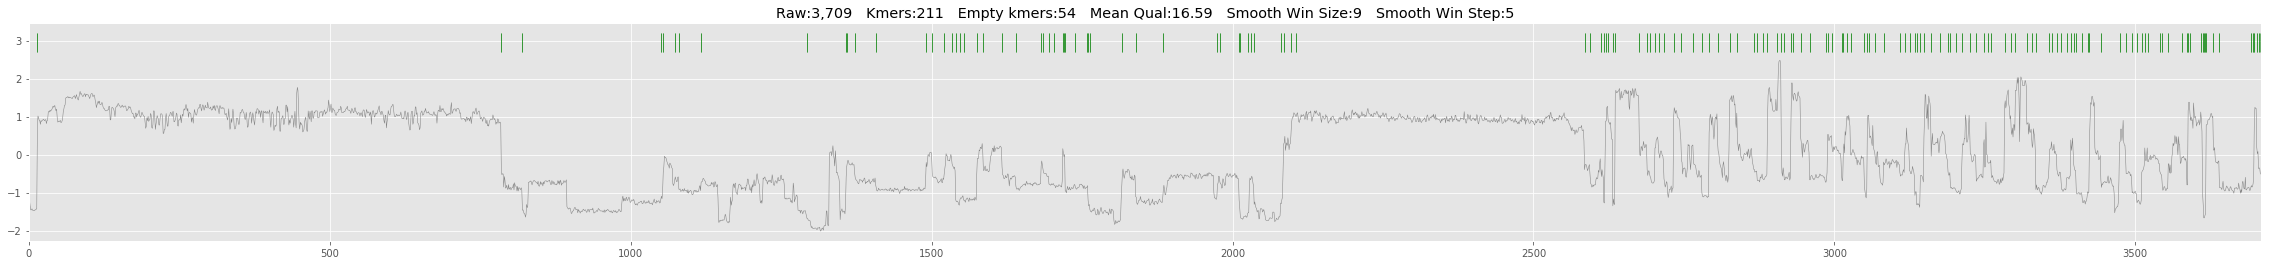

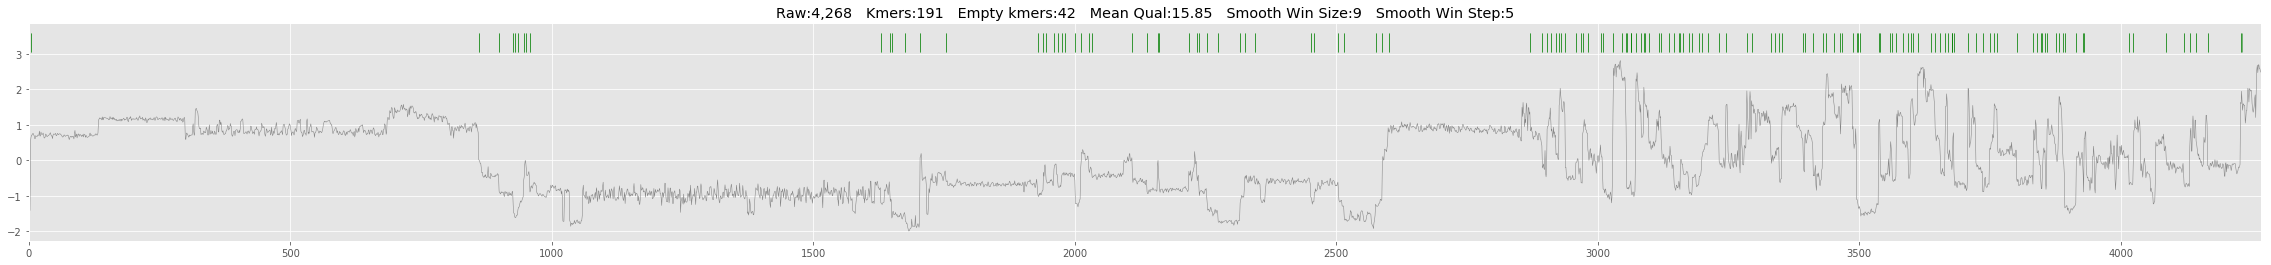

In [8]:
for fn in find_fast5_files_gen ("./data/"):
    try:
        f = Fast5 (fast5_file=fn, smooth_raw_signal=True, smoothing_win_size=9, smoothing_win_step=5, zscore_norm=True)
        fig = pl.figure(figsize=(40,4))
        ax = f.plot_raw()
    except AssertionError as E:
        print (E)

# Fast5_parse

In [5]:
f = Fast5Parse (fast5_dir="./data/basecall/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and find blocks
[Fast5Wrapper] file:./data/Fast5Tools/read.db
	Number of sequences:40


In [4]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and find blocks


In [4]:
f.sample (5)

[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_423_ch_335_strand.fast5
 	Read ID: ef1a293e-31cb-4eba-a05d-7be1665055bf
 	Count Raw signals: 26657
 	Albacore_basecalling
 		Seq: CGGUUGACUG...UAAAUCCAGG / Length: 530 / Empty kmers: 95 / Mean quality: 10.08,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_450_ch_239_strand.fast5
 	Read ID: b4c3f292-914e-4248-9abc-ffd8091032a3
 	Count Raw signals: 34752
 	Albacore_basecalling
 		Seq: CAUAGAUUAA...UAUUAAAACC / Length: 671 / Empty kmers: 95 / Mean quality: 10.96,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_24_ch_49_strand.fast5
 	Read ID: 24672465-c4a6-477b-97d5-b4157b4f94a7
 	Count Raw

In [5]:
f = Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db")

# Alignment parsing

In [14]:
f = Fast5Parse (fast5_dir="./data/basecall/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True, include_supplementary=True)
f.add_bam_alignment (alignment_fn="./data/align/genome_aligned_reads.bam", analysis_name="Genome_Alignment", include_secondary=True, include_supplementary=True)

Initialise
Parse Fast5 files and find blocks
Parse reads from file ./data/align/cDNA_aligned_reads.bam


23it [00:00, 858.83it/s]

	Reads found
	valid: 21
	unmapped: 2
Parse reads from file ./data/align/genome_aligned_reads.bam



23it [00:00, 2049.52it/s]

	Reads found
	valid: 23


In [6]:
for i in f :
    print (i)

[Fast5] file:/home/aleg/Programming/Fast5Tools/tests/data/basecall/workspace/calibration_strands/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_317_strand.fast5
	Read ID: 0ec08188-8c7f-4768-9015-d9fb5a4376c8
	Count Raw signals: 58215
	Albacore_basecalling
		Seq: ACUUCAGAUU...AAAAUCCCAG / Length: 1355 / Empty kmers: 225 / Mean quality: 11.28

[Fast5] file:/home/aleg/Programming/Fast5Tools/tests/data/basecall/workspace/fail/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_37_strand.fast5
	Read ID: 6c4372bc-0fb8-4cb8-9927-8fb49868f628
	Count Raw signals: 32314
	Albacore_basecalling
		Seq: GUUCUAUACG...CAUCCCAUUC / Length: 523 / Empty kmers: 112 / Mean quality: 8.68

[Fast5] file:/home/aleg/Programming/Fast5Tools/tests/data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_301_strand.fast5
	Read ID: 6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0
	Count Raw signals: 24541
	Albacore_basecalling
		Seq: ACAUUAUUCA...AUUCCCUAUG / Length: 

In [10]:
pp (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Transcriptome_Alignment'].read_list)
print (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Transcriptome_Alignment'].best_read())

[Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:697 (0 pb) / Reference:YPL198W-9:723(+) (714 pb) / Alignment len:680 / Mapq:0 / Align Score:692,
 Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:707 (819 pb) / Reference:YGL076C-9:735(+) (726 pb) / Alignment len:690 / Mapq:60 / Align Score:788]
Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:707 (819 pb) / Reference:YGL076C-9:735(+) (726 pb) / Alignment len:690 / Mapq:60 / Align Score:788


In [11]:
pp (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Genome_Alignment'].read_list)
print (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Genome_Alignment'].best_read())

[Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-98:704 (819 pb) / Reference:VII-364319:364964(-) (645 pb) / Alignment len:606 / Mapq:21 / Align Score:678,
 Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-115:697 (0 pb) / Reference:XVI-174072:174690(+) (618 pb) / Alignment len:582 / Mapq:0 / Align Score:630]
Query1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-98:704 (819 pb) / Reference:VII-364319:364964(-) (645 pb) / Alignment len:606 / Mapq:21 / Align Score:678


# NanopolishParser

#  larger dataset test

In [5]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam", analysis_name="Genome_Alignment")

f.head (2)

Initialise
Parse Fast5 files and find blocks
Parse reads from file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam


14714it [00:04, 3076.18it/s]


	Reads found	valid: 13920	secondary: 2222	unmapped: 794
	Unique Fast5 with alignments 11698
Parse reads from file /home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam


14036it [00:04, 3044.50it/s]


	Reads found	valid: 12348	secondary: 1544	unmapped: 144
	Unique Fast5 with alignments 12348


[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_411_ch_410_strand.fast5
 	Read ID: 074cb613-a984-4296-bf50-5d3d37c129e0
 	Count Raw signals: 20480
 	Albacore_basecalling
 		Seq: CUUCUGUCAA...CCUACCAAUC / Length: 557 / Empty kmers: 112 / Mean quality: 9.95
 	Transcriptome_Alignment
 		Query:074cb613-a984-4296-bf50-5d3d37c129e0-42:392 (561 pb) / Reference:YLR110C-13:402(+) (389 pb) / Alignment len:350 / Mapq:32 / Align Score:286
 	Genome_Alignment
 		Query:074cb613-a984-4296-bf50-5d3d37c129e0-74:561 (561 pb) / Reference:XII-369588:370130(-) (542 pb) / Alignment len:487 / Mapq:60 / Align Score:199,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_405_ch_384_strand.fast5
 	Read ID: 3d8848fb-28f7-46cd-b6ce-4977c6f445ad
 	Count Raw signals: 9644
 	Albacore_ba

In [16]:
f = Fast5Wrapper ("/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db")
r = f["074cb613-a984-4296-bf50-5d3d37c129e0"]
display (pd.DataFrame(r.analyses["Albacore_basecalling"].events))

mean  start       stdv  length model_state  move  p_model_state  \
0     109.781174   1007  11.363922      15    b'CTAAC'     1       0.427329   
1     110.999275   1022   8.304236      15    b'CTAAC'     0       0.479592   
2     110.300529   1037   7.179019      15    b'CTAAC'     0       0.393905   
3     105.616936   1052  24.466324      15    b'CTAAC'     0       0.239734   
4      90.395248   1067   9.852345      15    b'TAACC'     1       0.508819   
5      81.509636   1082  19.388641      15    b'TAACC'     0       0.473262   
6      78.525734   1097   5.002959      15    b'AACCA'     1       0.301328   
7      77.383163   1112   7.966383      15    b'ACCAT'     1       0.401506   
8      78.261337   1127   7.210805      15    b'ACCAT'     0       0.431310   
9      78.837341   1142   6.621765      15    b'ACCAT'     0       0.369031   
10     79.063972   1157   4.520099      15    b'ACCAT'     0       0.311566   
11     79.130074   1172   3.598157      15    b'ACCAT'     0       0.283015   
12     79.734406   1187   3.978402      15    b'ACCAT'     0       0.269862   
13     80.130997   1202   5.603211      15    b'ACCAT'     0       0.210354   
14     79.205620   1217   4.528966      15    b'ACCAT'     0       0.210293   
15     77.345390   1232   9.019460      15    b'ACCAT'     0       0.209989   
16     79.366142   1247   4.223972      15    b'CATCC'     2       0.551922   
17     75.428520   1262  21.422804      15    b'CATCC'     0       0.551589   
18     67.232231   1277   4.627421      15    b'ATCCC'     1       0.515821   
19     65.032074   1292   8.879128      15    b'ATCCC'     0       0.277792   
20     64.956535   1307   6.321060      15    b'TCCCT'     1       0.680984   
21     68.091530   1322   2.599926      15    b'CCCTC'     1       0.516392   
22     66.250191   1337   7.851728      15    b'CCCTC'     0       0.515655   
23     67.619385   1352   6.387363      15    b'CCCTC'     0       0.485479   
24     66.807304   1367   3.724196      15    b'CCCTC'     0       0.439799   
25     67.723259   1382   5.941719      15    b'CCCTC'     0       0.370572   
26     69.630692   1397   3.741037      15    b'CCCTC'     0       0.218666   
27     64.333313   1412   5.296686      15    b'CCCTC'     0       0.186307   
28     64.899879   1427   8.729495      15    b'CCCTC'     0       0.055627   
29     67.213348   1442   4.671428      15    b'CCTCC'     1       0.444474   
...          ...    ...        ...     ...         ...   ...            ...   
1268   91.415070  20027  10.444616      15    b'AAATT'     1       0.914953   
1269   94.059029  20042   9.863064      15    b'AAATT'     0       0.868514   
1270   93.350822  20057   9.799805      15    b'AAATT'     0       0.867944   
1271   84.644623  20072   5.451980      15    b'AATTC'     1       0.879904   
1272   84.276344  20087   3.422908      15    b'AATTC'     0       0.879768   
1273   76.797707  20102  17.585394      15    b'AATTC'     0       0.877396   
1274   73.115051  20117   3.556289      15    b'ATTCG'     1       0.706937   
1275   82.406693  20132  40.065212      15    b'ATTCG'     0       0.704181   
1276   92.595398  20147  41.780212      15    b'TTCGC'     1       0.316295   
1277   81.264137  20162   7.322896      15    b'TCGCA'     1       0.169134   
1278   82.000656  20177   6.020876      15    b'TCGCA'     0       0.162121   
1279   80.470924  20192   7.736933      15    b'TCGCA'     0       0.160865   
1280   84.824043  20207  13.101390      15    b'TCGCA'     0       0.047859   
1281   88.846634  20222  13.970800      15    b'GCAAC'     2       0.053982   
1282   85.163979  20237   7.707317      15    b'CAACT'     1       0.460563   
1283   79.186714  20252   8.511353      15    b'CAACT'     0       0.451173   
1284   87.137512  20267  48.751324      15    b'AACTG'     1       0.104475   
1285   92.510414  20282  40.181545      15    b'ACTGT'     1       0.463947   
1286  101.641533  20297  28.181778      15    b'CTGTC'     1  

In [13]:
d = {}

with open ("/home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_raw.tsv", "rt") as fp:
    
    read_name_prev = ""
    first = True
    
    for line in fp:
        if first:
            first = False
            continue
            
        # Split fields
        contig, pos, ref_kmer, read_name, strand, ev_index, ev_lev_mean, ev_sd, ev_len, model_kmer, model_mean, model_sd, std_level, raw = line.split("\t")
        
        # Fill in the list for the current read name
        if read_name == read_name_prev:
            l.append ((ref_kmer, pos, ev_index, ev_lev_mean, ev_sd, ev_len, raw))
        
        else:
            # Add previous list to read_id dict
            if read_name_prev:
                d [read_name_prev] = np.array (
                    l[::-1], dtype=[
                        ('ref_kmer', '<U5'),
                        ('position', np.uint32),
                        ('event_index', np.uint32),
                        ('event_lev_mean', np.float32),
                        ('event_sd', np.float32),
                        ('event_len', np.float32),
                        ('raw', '<U100')])
            
            # Create new entry
            read_name_prev = read_name
            l = []
            l.append ((ref_kmer, pos, ev_index, ev_lev_mean, ev_sd, ev_len, raw))

In [20]:
read_name = "3d8848fb-28f7-46cd-b6ce-4977c6f445ad"

display (pd.DataFrame(d [read_name]).head())
display (f[read_name].raw [0:20])

ref_kmer  position  event_index  event_lev_mean  event_sd  event_len  \
0    TTGCT       895          536      119.360001     4.519    0.00531   
1    TTGCT       895          535      107.349998     2.099    0.00266   
2    TTGCT       895          534      109.669998     2.977    0.00598   
3    TTGCT       895          533       89.910004     2.129    0.00631   
4    TTGCT       895          532       92.980003     0.981    0.00266   

                                                                                                    raw  
0  117.846,121.582,109.028,123.375,113.96,118.294,118.443,117.547,116.052,123.226,126.365,128.606,122.1  
1                                     105.142,105.441,106.337,108.878,110.821,110.074,104.544,107.533\n  
2  111.718,111.27,111.867,115.454,108.43,113.212,110.672,106.188,110.223,109.476,112.914,111.718,108.43  
3  86.6093,88.1038,89.2995,88.5522,90.0468,90.9435,92.8864,91.8402,86.9082,88.5522,90.4951,93.0359,91.8  
4                                     93.4843,92.1391,91.9897,95.2777,92.5875,92.4381,93.6337,92.2886\n

array([839, 864, 780, 876, 813, 842, 843, 837, 827, 875, 896, 911, 868,
       842, 814, 859, 754, 756, 762, 779], dtype=int16)

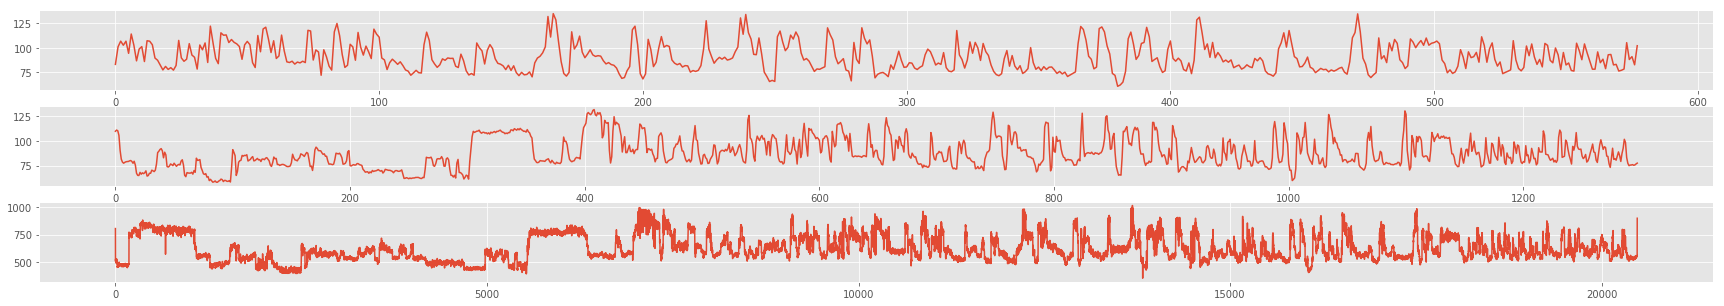

In [25]:
read_name = "074cb613-a984-4296-bf50-5d3d37c129e0"

fig, (ax1, ax2, ax3) = pl.subplots(3,1, figsize=(30,5))
_ = pd.DataFrame(d [read_name])["event_lev_mean"].plot(ax=ax1)
_ = pd.DataFrame(f[read_name].analyses["Albacore_basecalling"].events)["mean"].plot(ax=ax2)
_ = ax3.plot(f[read_name].raw)

In [12]:
db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db"

with shelve.open (db_file, flag = "r") as db:
    print (db)